In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [350]:
df=pd.read_excel("C:/Users/aksha/OneDrive/Desktop/Projects/flight_data/BOM_flights.xlsx")
df.head()

,Unnamed: 0,status,type,airline.iataCode,airline.name,arrival.actualTime,arrival.delay,arrival.estimatedTime,arrival.iataCode,arrival.scheduledTime,...,arrival.delay_missing,departure.delay_missing,arrival.actualTime_missing,departure.actualTime_missing,arrival.estimatedTime_missing,departure.estimatedTime_missing,flight_duration_missing,total_delay_missing,arrival_early_flag,departure_early_flag
0,0,active,departure,AI,Air India,2025-09-23 12:45:00,NaN,2025-09-23 12:45:00,DEL,2025-09-23 12:45:00,...,True,False,True,False,True,False,True,False,False,False
1,1,active,departure,BA,British Airways,2025-09-23 12:50:00,NaN,2025-09-23 12:50:00,TRV,2025-09-23 12:50:00,...,True,False,True,False,True,False,True,False,False,False
2,2,active,departure,VS,Virgin Atlantic,2025-09-23 12:50:00,NaN,2025-09-23 12:50:00,TRV,2025-09-23 12:50:00,...,True,False,True,False,True,False,True,False,False,False
3,3,active,departure,6E,IndiGo,2025-09-23 12:50:00,NaN,2025-09-23 12:50:00,TRV,2025-09-23 12:50:00,...,True,False,True,False,True,False,True,False,False,False
4,4,active,departure,6E,IndiGo,2025-09-23 12:53:00,NaN,2025-09-23 12:53:00,TRZ,2025-09-23 12:40:00,...,False,False,True,False,False,False,True,False,False,False


In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Unnamed: 0                       1035 non-null   int64         
 1   status                           1035 non-null   object        
 2   type                             1035 non-null   object        
 3   airline.iataCode                 1035 non-null   object        
 4   airline.name                     1035 non-null   object        
 5   arrival.actualTime               1035 non-null   datetime64[ns]
 6   arrival.delay                    560 non-null    float64       
 7   arrival.estimatedTime            1035 non-null   datetime64[ns]
 8   arrival.iataCode                 1035 non-null   object        
 9   arrival.scheduledTime            1035 non-null   datetime64[ns]
 10  departure.actualTime             1035 non-null   datetime64[

In [352]:
cols= ['Unnamed: 0','arrival.actualTime', 'arrival.estimatedTime', 'arrival.scheduledTime', 'departure.actualTime', 'departure.estimatedTime', 'departure.scheduledTime',
                'total_delay_missing', 'arrival.delay_missing', 'departure.delay_missing', 'arrival.actualTime_missing', 'departure.actualTime_missing',
                'arrival.estimatedTime_missing', 'departure.estimatedTime_missing', 'flight_duration_missing', 'arrival_early_flag', 'departure_early_flag', 
                'departure_delay_flag', 'arrival_delay_flag','arrival.iataCode', 'departure.iataCode', 'flight.iataNumber']
flight_df=df.drop(columns=cols)

In [353]:
flight_df.head()

,status,type,airline.iataCode,airline.name,arrival.delay,departure.delay,orig_country,dest_country,departure_hour,arrival_hour,total_delay,flight_type,flight_duration
0,active,departure,AI,Air India,NaN,34.0,India,India,10,12,34,Domestic,101
1,active,departure,BA,British Airways,NaN,47.0,India,India,10,12,47,Domestic,88
2,active,departure,VS,Virgin Atlantic,NaN,47.0,India,India,10,12,47,Domestic,88
3,active,departure,6E,IndiGo,NaN,47.0,India,India,10,12,47,Domestic,88
4,active,departure,6E,IndiGo,NaN,41.0,India,India,10,12,41,Domestic,97


In [354]:
def delay_category(x):
    if x < 0:
        return "Early"
    elif x == 0:
        return "On-Time"
    else:
        return "Delayed"

In [355]:
flight_df["delay_category"] = flight_df["total_delay"].apply(delay_category)

In [356]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status            1035 non-null   object 
 1   type              1035 non-null   object 
 2   airline.iataCode  1035 non-null   object 
 3   airline.name      1035 non-null   object 
 4   arrival.delay     560 non-null    float64
 5   departure.delay   475 non-null    float64
 6   orig_country      1032 non-null   object 
 7   dest_country      1033 non-null   object 
 8   departure_hour    1035 non-null   int64  
 9   arrival_hour      1035 non-null   int64  
 10  total_delay       1035 non-null   int64  
 11  flight_type       1035 non-null   object 
 12  flight_duration   1035 non-null   int64  
 13  delay_category    1035 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 113.3+ KB


In [357]:
flight_df.describe()

,arrival.delay,departure.delay,departure_hour,arrival_hour,total_delay,flight_duration
count,560.000000,475.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,-9.169643,12.606316,15.903382,15.682126,0.824155,134.851208
std,20.541806,24.103477,4.416684,6.334519,24.744966,116.749509
min,-71.000000,-38.000000,0.000000,0.000000,-71.000000,-50.000000
25%,-23.000000,0.000000,12.500000,13.000000,-5.000000,85.000000
50%,0.000000,5.000000,16.000000,17.000000,0.000000,110.000000
75%,0.000000,22.000000,19.000000,20.500000,9.000000,135.000000
max,171.000000,215.000000,23.000000,23.000000,215.000000,1434.000000


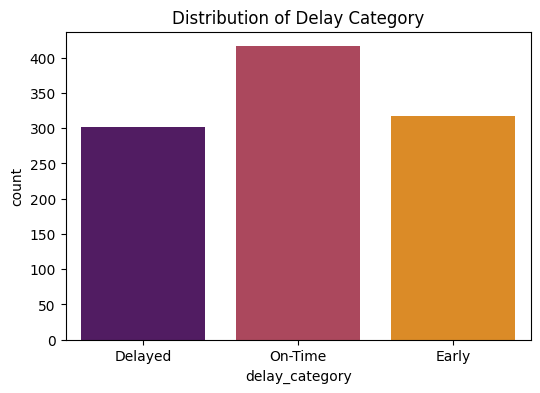

In [358]:
plt.figure(figsize=(6,4))
sns.countplot(x='delay_category', data=flight_df, palette='inferno', legend=False)
plt.title("Distribution of Delay Category")
plt.show()

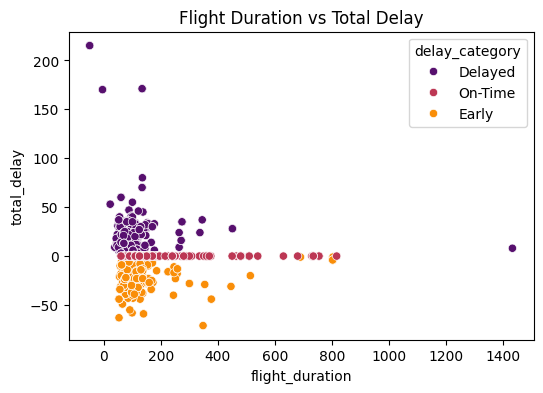

In [359]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='flight_duration', y='total_delay', hue='delay_category', palette='inferno', data=flight_df)
plt.title("Flight Duration vs Total Delay")
plt.show()

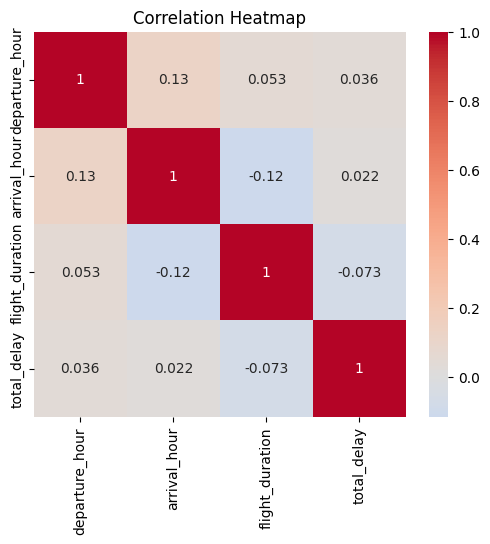

In [360]:
plt.figure(figsize=(6,5))
sns.heatmap(flight_df[['departure_hour','arrival_hour','flight_duration','total_delay']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [361]:
flight_df.columns

Index(['status', 'type', 'airline.iataCode', 'airline.name', 'arrival.delay',
       'departure.delay', 'orig_country', 'dest_country', 'departure_hour',
       'arrival_hour', 'total_delay', 'flight_type', 'flight_duration',
       'delay_category'],
      dtype='object')

In [362]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [363]:
flight_encoded=flight_df.copy()
flight_encoded['type']=flight_encoded['type'].replace({'arrival': 0, 'departure': 1})
flight_encoded['flight_type']=flight_encoded['flight_type'].replace({'Domestic': 0, 'International': 1})

In [364]:
freq_cols=['airline.iataCode', 'orig_country', 'dest_country']

for col in freq_cols:
    freq=flight_encoded[col].value_counts(normalize=True) 
    flight_encoded[col + '_freq']=flight_encoded[col].map(freq)

In [365]:
flight_encoded=flight_encoded.drop(columns=freq_cols)
flight_encoded.head()

,status,type,airline.name,arrival.delay,departure.delay,departure_hour,arrival_hour,total_delay,flight_type,flight_duration,delay_category,airline.iataCode_freq,orig_country_freq,dest_country_freq
0,active,1,Air India,NaN,34.0,10,12,34,0,101,Delayed,0.182609,0.917636,0.916747
1,active,1,British Airways,NaN,47.0,10,12,47,0,88,Delayed,0.035749,0.917636,0.916747
2,active,1,Virgin Atlantic,NaN,47.0,10,12,47,0,88,Delayed,0.167150,0.917636,0.916747
3,active,1,IndiGo,NaN,47.0,10,12,47,0,88,Delayed,0.225121,0.917636,0.916747
4,active,1,IndiGo,NaN,41.0,10,12,41,0,97,Delayed,0.225121,0.917636,0.916747


In [366]:
x=flight_encoded.drop(columns=['status', 'airline.name', 'arrival.delay', 'departure.delay', 'total_delay','delay_category'])
y=flight_encoded['delay_category']

In [367]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.3)

In [368]:
scaler=StandardScaler()
xtrain_scaled=scaler.fit_transform(xtrain)
xtest_scaled=scaler.transform(xtest)

In [369]:
model=RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=10, max_features='sqrt', random_state=42)
model.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=200,
                       random_state=42)

In [370]:
ypred = model.predict(xtest)

In [371]:
print(f"Accuracy score: ", accuracy_score(ytest,ypred))

Accuracy score:  0.8456591639871383


In [372]:
train_acc = model.score(xtrain, ytrain)
test_acc = model.score(xtest, ytest)
print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

Train Accuracy: 0.88
Test Accuracy: 0.85


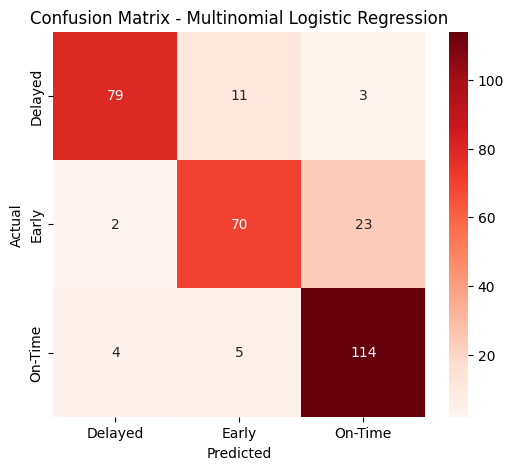

In [373]:
cm=confusion_matrix(ytest, ypred, labels=model.classes_)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Multinomial Logistic Regression")
plt.show()